## https://www.worldometers.info/coronavirus/#countries

In [ ]:
#!pip install beautifulsoup4
from bs4 import BeautifulSoup as soup
from datetime import date, datetime
from urllib.request import Request, urlopen
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import gc
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import requests
imdb_url = "https://www.worldometers.info/coronavirus/#countries"
imdb_html = requests.get(imdb_url)
imdb_html

<Response [200]>

In [ ]:
url = "https://www.worldometers.info/coronavirus/#countries"
req = Request(url)
webpage = urlopen(req)
webpage


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon
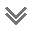

In [ ]:
page_soup = soup(webpage, "html.parser")
page_soup

In [ ]:
today = datetime.now()
today

datetime.datetime(2024, 12, 15, 21, 18, 31, 731698)

In [ ]:
yesterday_str = "%s %d, %d" %(date.today().strftime("%b"), today.day-1, today.year)
yesterday_str

'Dec 14, 2024'

In [ ]:
table = page_soup.findAll('table', {"id":"main_table_countries_yesterday"})
table

[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_yesterday" style="width:100%;margin-top: 0px !important;display:none;">
 <thead>
 <tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New 

In [ ]:
containers = table[0].findAll("tr",{"style":""})
containers

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>704,753,890</td>
 <td

In [ ]:
containers

[<tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>704,753,890</td>
 <td>+3,959</td>
 <td>7,010,681</td>
 <td>+57</td>
 <td>675,619,021</td>
 <td>+14,953</td>
 <td>22,124,188</td>
 <td>34,791</td>
 <td>90,413</td>
 <td>899.4</td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="all" style="display:none">All</td>
 <!-- 1 Case every X -->
 <td>
 </td>
 <!-- 1 Death every X -->
 <td></td>
 <!-- 1 test every X -->
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 </tr>,
 <tr style="">
 <td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">1</td>
 <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/china/">China</a></td>
 <td style="font-weight: bold; text-align:right">503,302</td>
 <td style="font-weight: bold; text-align:right;"></td>
 <td style="font-weight: bold; text-align:right;">5,272                                </td>
 <td style="font-weight: bold; 
                             

In [ ]:
#title = containers[0]
#del containers[0]

all_data = []
clean = True

for country in containers:
    country_data = []
    country_container = country.findAll("td")
    if country_container[1].text =="China":
        continue
    for i in range(1, len(country_container)):
        final_feature = country_container[i].text
        if clean:
            if i!=1 and i!= len(country_container)-1:
                final_feature=final_feature.replace(",","")

                if final_feature.find('+') !=-1:
                    final_feature = final_feature.replace("+","")
                    final_feature = float(final_feature)
                elif final_feature.find("-") !=-1:
                    final_feature = final_feature.replace("-","")
                    final_feature = float(final_feature)*-1

            if final_feature =='N/A':
                final_feature = 0
            elif final_feature =="" or final_feature==" ":
                final_feature = -1
            country_data.append(final_feature)
    all_data.append(country_data)

In [ ]:
all_data

[['World',
  '704753890',
  3959.0,
  '7010681',
  57.0,
  '675619021',
  14953.0,
  '22124188',
  '34791',
  '90413',
  '899.4',
  -1,
  -1,
  -1,
  'All',
  '\n',
  -1,
  -1,
  -1,
  -1,
  -1],
 ['USA',
  '111820082',
  1151.0,
  '1219487                                ',
  7.0,
  '109814428',
  10109.0,
  '786167',
  '940',
  '333985',
  '3642',
  '1186851502',
  '3544901',
  '334805269 ',
  'North America',
  '3',
  '275',
  '0',
  '3',
  '0.02',
  '2,348'],
 ['India',
  '45035393',
  68.0,
  '533570                                ',
  -1,
  0,
  0,
  0,
  0,
  '32016',
  '379',
  '935879495',
  '665334',
  '1406631776 ',
  'Asia',
  '31',
  '2636',
  '2',
  '0.05',
  -1,
  '0.4'],
 ['Germany',
  '38828995',
  73.0,
  '183027                                ',
  16.0,
  '38240600',
  -1,
  '405368',
  0,
  '462891',
  '2182',
  '122332384',
  '1458359',
  '83883596 ',
  'Europe',
  '2',
  '458',
  '1',
  '0.9',
  '0.2',
  '4,833'],
 ['Brazil',
  '38743918',
  -1,
  '711380          

In [ ]:
df = pd.DataFrame(all_data)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,World,704753890,3959.0,7010681,57.0,675619021,14953.0,22124188,34791,90413,...,-1,-1,-1,All,\n,-1,-1,-1,-1,-1
1,USA,111820082,1151.0,1219487,7.0,109814428,10109.0,786167,940,333985,...,1186851502,3544901,334805269,North America,3,275,0,3,0.02,"2,348"
2,India,45035393,68.0,533570,-1.0,0,0.0,0,0,32016,...,935879495,665334,1406631776,Asia,31,2636,2,0.05,-1,0.4
3,Germany,38828995,73.0,183027,16.0,38240600,-1.0,405368,0,462891,...,122332384,1458359,83883596,Europe,2,458,1,0.9,0.2,"4,833"
4,Brazil,38743918,-1.0,711380,-1.0,36249161,-1.0,1783377,0,179908,...,63776166,296146,215353593,South America,6,303,3,-1,-1,"8,281"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Saint Helena,2166,-1.0,-1,-1.0,2,-1.0,2164,-1,354211,...,-1,-1,6115,Africa,3,-1,-1,-1,-1,"353,884"
200,Montserrat,1403,-1.0,8,-1.0,1376,-1.0,19,-1,282578,...,17762,3577442,4965,North America,4,621,0,-1,-1,"3,827"
201,Niue,1059,-1.0,-1,-1.0,1056,-1.0,3,-1,652898,...,-1,-1,1622,Australia/Oceania,2,-1,-1,-1,-1,"1,850"
202,Tokelau,80,-1.0,-1,-1.0,-1,-1.0,80,-1,58055,...,-1,-1,1378,Australia/Oceania,17,-1,-1,-1,-1,"58,055"


In [ ]:
df.drop([15,16,17,18,19,20], inplace=True, axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,World,704753890,3959.0,7010681,57.0,675619021,14953.0,22124188,34791,90413,899.4,-1,-1,-1,All
1,USA,111820082,1151.0,1219487,7.0,109814428,10109.0,786167,940,333985,3642,1186851502,3544901,334805269,North America
2,India,45035393,68.0,533570,-1.0,0,0.0,0,0,32016,379,935879495,665334,1406631776,Asia
3,Germany,38828995,73.0,183027,16.0,38240600,-1.0,405368,0,462891,2182,122332384,1458359,83883596,Europe
4,Brazil,38743918,-1.0,711380,-1.0,36249161,-1.0,1783377,0,179908,3303,63776166,296146,215353593,South America


In [ ]:
column_labels = ["Country", "Total Cases", "New Cases", "Total Deaths", "New Deaths", "Total Recovered",
                 "New Recovered", "Active Cases", "Serious,Critical", "Tot Cases/1M pop", "Deaths/1M pop",
                 "Total Tests", "Tests/1M pop", "Population", "Continent"]

In [ ]:
df.columns = column_labels
df.head(2)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Continent
0,World,704753890,3959.0,7010681,57.0,675619021,14953.0,22124188,34791,90413,899.4,-1,-1,-1,All
1,USA,111820082,1151.0,1219487,7.0,109814428,10109.0,786167,940,333985,3642,1186851502,3544901,334805269,North America


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           204 non-null    object 
 1   Total Cases       204 non-null    object 
 2   New Cases         204 non-null    float64
 3   Total Deaths      204 non-null    object 
 4   New Deaths        204 non-null    float64
 5   Total Recovered   204 non-null    object 
 6   New Recovered     204 non-null    float64
 7   Active Cases      204 non-null    object 
 8   Serious,Critical  204 non-null    object 
 9   Tot Cases/1M pop  204 non-null    object 
 10  Deaths/1M pop     204 non-null    object 
 11  Total Tests       204 non-null    object 
 12  Tests/1M pop      204 non-null    object 
 13  Population        204 non-null    object 
 14  Continent         204 non-null    object 
dtypes: float64(3), object(12)
memory usage: 24.0+ KB


In [ ]:
for label in df.columns:
    if label !="Country" and label !="Continent":
        df[label] = pd.to_numeric(df[label])

In [ ]:
df.head(2)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Continent
0,World,704753890,3959.0,7010681,57.0,675619021,14953.0,22124188,34791,90413.0,899.4,-1,-1,-1,All
1,USA,111820082,1151.0,1219487,7.0,109814428,10109.0,786167,940,333985.0,3642.0,1186851502,3544901,334805269,North America


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           204 non-null    object 
 1   Total Cases       204 non-null    int64  
 2   New Cases         204 non-null    float64
 3   Total Deaths      204 non-null    int64  
 4   New Deaths        204 non-null    float64
 5   Total Recovered   204 non-null    int64  
 6   New Recovered     204 non-null    float64
 7   Active Cases      204 non-null    int64  
 8   Serious,Critical  204 non-null    int64  
 9   Tot Cases/1M pop  204 non-null    float64
 10  Deaths/1M pop     204 non-null    float64
 11  Total Tests       204 non-null    int64  
 12  Tests/1M pop      204 non-null    int64  
 13  Population        204 non-null    int64  
 14  Continent         204 non-null    object 
dtypes: float64(5), int64(8), object(2)
memory usage: 24.0+ KB


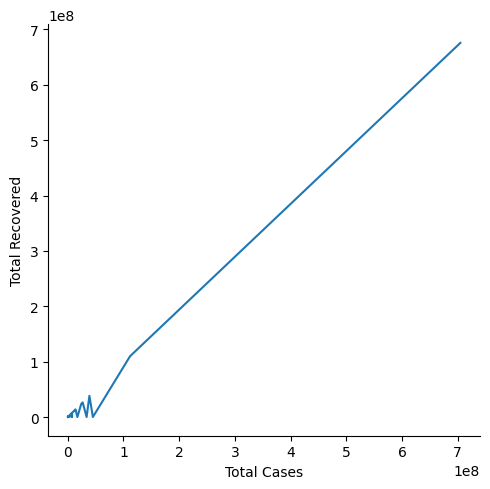

In [ ]:
sns.relplot(x = "Total Cases", y="Total Recovered", kind="line", data=df)
plt.show()